<a href="https://www.kaggle.com/code/rasulmah/games?scriptVersionId=131524317" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Since this is my first attempt at updating a notebook with a real-world dataset on Kaggle, I tried the first version using Python. I'm hoping to improve my knowledge in the field of data science.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/popular-video-games-1980-2023/games.csv


In [2]:
games = pd.read_csv("/kaggle/input/popular-video-games-1980-2023/games.csv")

In [3]:
games.rename(columns = {'Unnamed: 0': 'No'}, inplace = True)

In [4]:
#no. of rows and columns
games.shape

(1512, 14)

In [5]:
#info about the data
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1511 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


In [6]:
#check the missing value of Team
games[games['Team'].isna() == True]

,No,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
1245,1245,NEET Girl Date Night,"Oct 21, 2022",NaN,2.7,21,21,['Visual Novel'],Your friend sets you up on a date with his NEE...,"['this sucked. ""Omg she is literally me"" is no...",106,1,44,42


In [7]:
#update it
games.at[1245, 'Team'] = "Hitsuji Goods"

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1512 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   object 
 6   Number of Reviews  1512 non-null   object 
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   object 
 11  Playing            1512 non-null   object 
 12  Backlogs           1512 non-null   object 
 13  Wishlist           1512 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 165.5+ KB


In [9]:
#convert the dtype of coulmns, which have the object as dtype
def rmv(x):
        y = x.split('K')
        return float(y[0])*1000 if len(y) == 2 else float(y[0])

In [10]:
games['Times Listed'] = games['Times Listed'].apply(rmv)
games['Number of Reviews'] = games['Number of Reviews'].apply(rmv)
games['Plays'] = games['Plays'].apply(rmv)
games['Playing'] = games['Playing'].apply(rmv)
games['Backlogs'] = games['Backlogs'].apply(rmv)
games['Wishlist'] = games['Wishlist'].apply(rmv)


In [11]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1512 non-null   object 
 4   Rating             1499 non-null   float64
 5   Times Listed       1512 non-null   float64
 6   Number of Reviews  1512 non-null   float64
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   float64
 11  Playing            1512 non-null   float64
 12  Backlogs           1512 non-null   float64
 13  Wishlist           1512 non-null   float64
dtypes: float64(7), int64(1), object(6)
memory usage: 165.5+ KB


In [12]:
games.describe()

,No,Rating,Times Listed,Number of Reviews,Plays,Playing,Backlogs,Wishlist
count,1512.000000,1499.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,755.500000,3.719346,769.459656,769.459656,6253.578704,267.379630,1452.577381,780.540344
std,436.621117,0.532608,687.840871,687.840871,5894.977122,426.453368,1341.971968,801.253431
min,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
25%,377.750000,3.400000,284.000000,284.000000,1800.000000,43.000000,461.750000,212.000000
50%,755.500000,3.800000,551.000000,551.000000,4200.000000,112.500000,1000.000000,496.000000
75%,1133.250000,4.100000,1000.000000,1000.000000,9100.000000,298.000000,2100.000000,1100.000000
max,1511.000000,4.800000,4300.000000,4300.000000,33000.000000,3800.000000,8300.000000,5400.000000


In [13]:
#check the NaN values of Rating
games[games['Rating'].isna() == True]

,No,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
587,587,Final Fantasy XVI,"Jun 22, 2023","['Square Enix', 'Square Enix Creative Business...",NaN,422.0,422.0,['RPG'],Final Fantasy XVI is an upcoming action role-p...,[],37.0,10.0,732.0,2400.0
649,649,Death Stranding 2,releases on TBD,['Kojima Productions'],NaN,105.0,105.0,"['Adventure', 'Shooter']",NaN,[],3.0,0.0,209.0,644.0
713,713,Final Fantasy VII Rebirth,"Dec 31, 2023",['Square Enix'],NaN,192.0,192.0,[],This next standalone chapter in the FINAL FANT...,[],20.0,3.0,354.0,1100.0
719,719,Lies of P,"Aug 01, 2023","['NEOWIZ', 'Round8 Studio']",NaN,175.0,175.0,['RPG'],"Inspired by the familiar story of Pinocchio, L...",[],5.0,0.0,260.0,939.0
726,726,Judas,"Mar 31, 2025",['Ghost Story Games'],NaN,90.0,90.0,"['Adventure', 'Shooter']",A disintegrating starship. A desperate escape ...,[],1.0,0.0,92.0,437.0
746,746,Like a Dragon Gaiden: The Man Who Erased His Name,"Dec 31, 2023","['Ryū Ga Gotoku Studios', 'Sega']",NaN,118.0,118.0,"['Adventure', 'Brawler', 'RPG']",This game covers Kiryu's story between Yakuza ...,[],2.0,1.0,145.0,588.0
972,972,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023","['Nintendo', 'Nintendo EPD Production Group No...",NaN,581.0,581.0,"['Adventure', 'RPG']",The Legend of Zelda: Tears of the Kingdom is t...,[],72.0,6.0,1600.0,5400.0
1130,1130,Star Wars Jedi: Survivor,"Apr 28, 2023","['Respawn Entertainment', 'Electronic Arts']",NaN,250.0,250.0,['Adventure'],The story of Cal Kestis continues in Star Wars...,[],13.0,2.0,367.0,1400.0
1160,1160,We Love Katamari Reroll + Royal Reverie,"Jun 02, 2023","['Bandai Namco Entertainment', 'MONKEYCRAFT Co...",NaN,51.0,51.0,"['Adventure', 'Puzzle']",We Love Katamari Reroll + Royal Reverie is a r...,[],3.0,0.0,74.0,291.0
1202,1202,Earthblade,"Dec 31, 2024",['Extremely OK Games'],NaN,83.0,83.0,"['Adventure', 'Indie', 'RPG']","You are Névoa, an enigmatic child of Fate retu...",[],0.0,1.0,103.0,529.0


In [14]:
#update the rating with median
games['Rating'] = games['Rating'].fillna(games['Rating'].median())

In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 1512 non-null   int64  
 1   Title              1512 non-null   object 
 2   Release Date       1512 non-null   object 
 3   Team               1512 non-null   object 
 4   Rating             1512 non-null   float64
 5   Times Listed       1512 non-null   float64
 6   Number of Reviews  1512 non-null   float64
 7   Genres             1512 non-null   object 
 8   Summary            1511 non-null   object 
 9   Reviews            1512 non-null   object 
 10  Plays              1512 non-null   float64
 11  Playing            1512 non-null   float64
 12  Backlogs           1512 non-null   float64
 13  Wishlist           1512 non-null   float64
dtypes: float64(7), int64(1), object(6)
memory usage: 165.5+ KB


In [16]:
# create a datetime objet
dt = datetime.datetime.now()
dt_str = dt.strftime('%b %d, %Y')
games['Release Date'] = games['Release Date'].str.replace('releases on TBD', dt_str )

games['Release Date'] = pd.to_datetime(games['Release Date'], format='%b %d, %Y')
# format the datetime object as a string in the desired format
games['Release Date'] = games['Release Date'].dt.strftime('%Y-%-m-%-d')

In [17]:
#convert the data column to a datetime object
games['Release Date'] = pd.to_datetime(games['Release Date'])

#get the specific values from the date column
games['Day'] = games['Release Date'].dt.day
games['Month'] = games['Release Date'].dt.strftime('%b')
games['Year'] = games['Release Date'].dt.year
games['Week day'] = games['Release Date'].dt.day_name()

In [18]:
games[['Release Date', 'Day', 'Month', 'Year', 'Week day']].head()

,Release Date,Day,Month,Year,Week day
0,2022-02-25,25,Feb,2022,Friday
1,2019-12-10,10,Dec,2019,Tuesday
2,2017-03-03,3,Mar,2017,Friday
3,2015-09-15,15,Sep,2015,Tuesday
4,2017-02-24,24,Feb,2017,Friday


### Exploratory Analysis and Visualization

In [19]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Rating & Plays

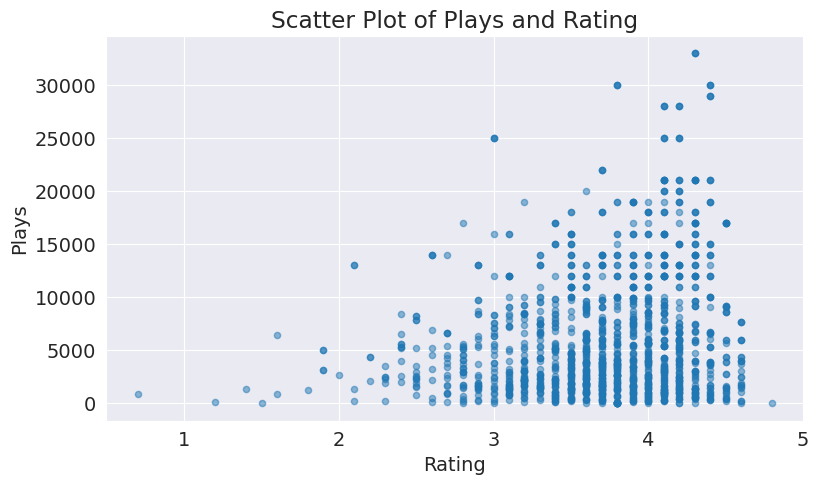

In [20]:
#creating the scatter plot
games.plot.scatter(x='Rating', y='Plays', cmap="YlOrRd", alpha=0.5)
plt.title('Scatter Plot of Plays and Rating')
plt.show()

* Games rated between 3 and 5 have the most plays.

Rating distribution

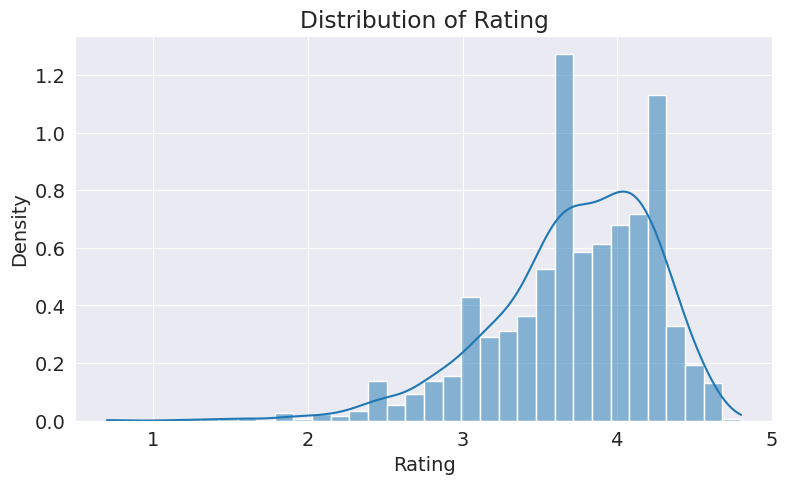

In [21]:
sns.histplot(games["Rating"], kde=True, stat="density");
plt.xlabel("Rating")
plt.ylabel("Density")
plt.title("Distribution of Rating");

In [22]:
games['Rating'].describe()

count    1512.000000
mean        3.720040
std         0.530364
min         0.700000
25%         3.400000
50%         3.800000
75%         4.100000
max         4.800000
Name: Rating, dtype: float64

* Negatively skewed distribution, mean is smaller than the median

Backlogs Vs Wishlist

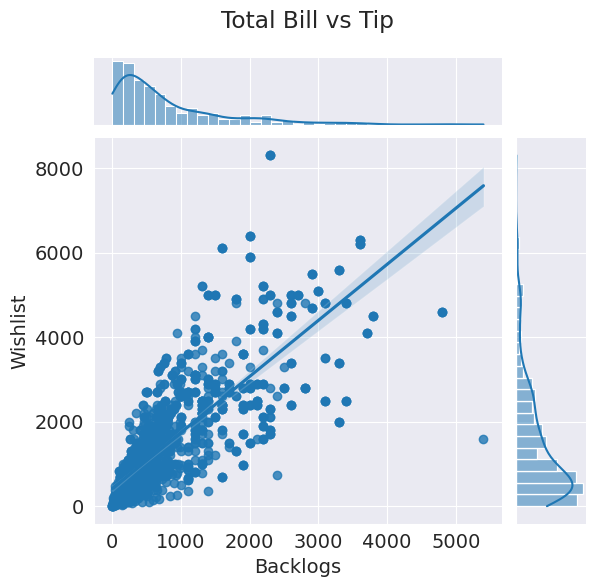

In [23]:
sns.jointplot(x="Wishlist", y="Backlogs", data=games, kind="reg")
# Add title and axis labels
plt.subplots_adjust(top=0.9)
plt.suptitle('Total Bill vs Tip')
plt.xlabel('Backlogs')
plt.ylabel('Wishlist')

# Show the plot
plt.show()

* The wishlist and backlogs are more saturated between (0,1000) and (0,2000) respectively.

Rating & No. of Reviews

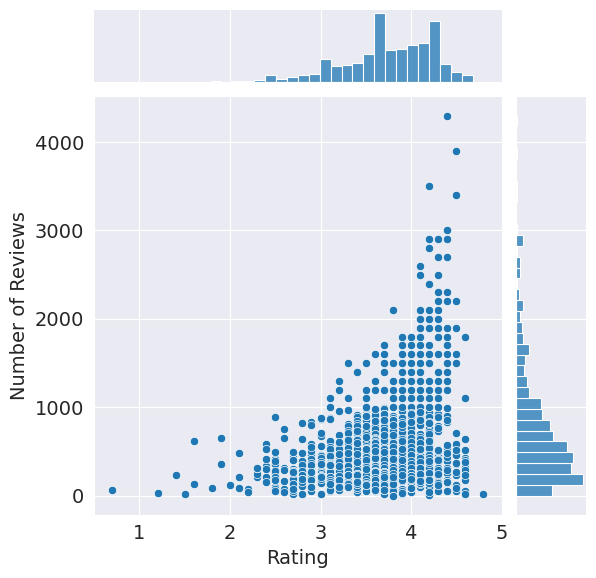

In [24]:
sns.jointplot(x='Rating', y='Number of Reviews', data=games, kind='scatter')
plt.show()

* From the plot, we can understand that games with ratings between 4 to 4.5 received a large number of reviews.

Comparison of Wishlist & Backlogs with Rating

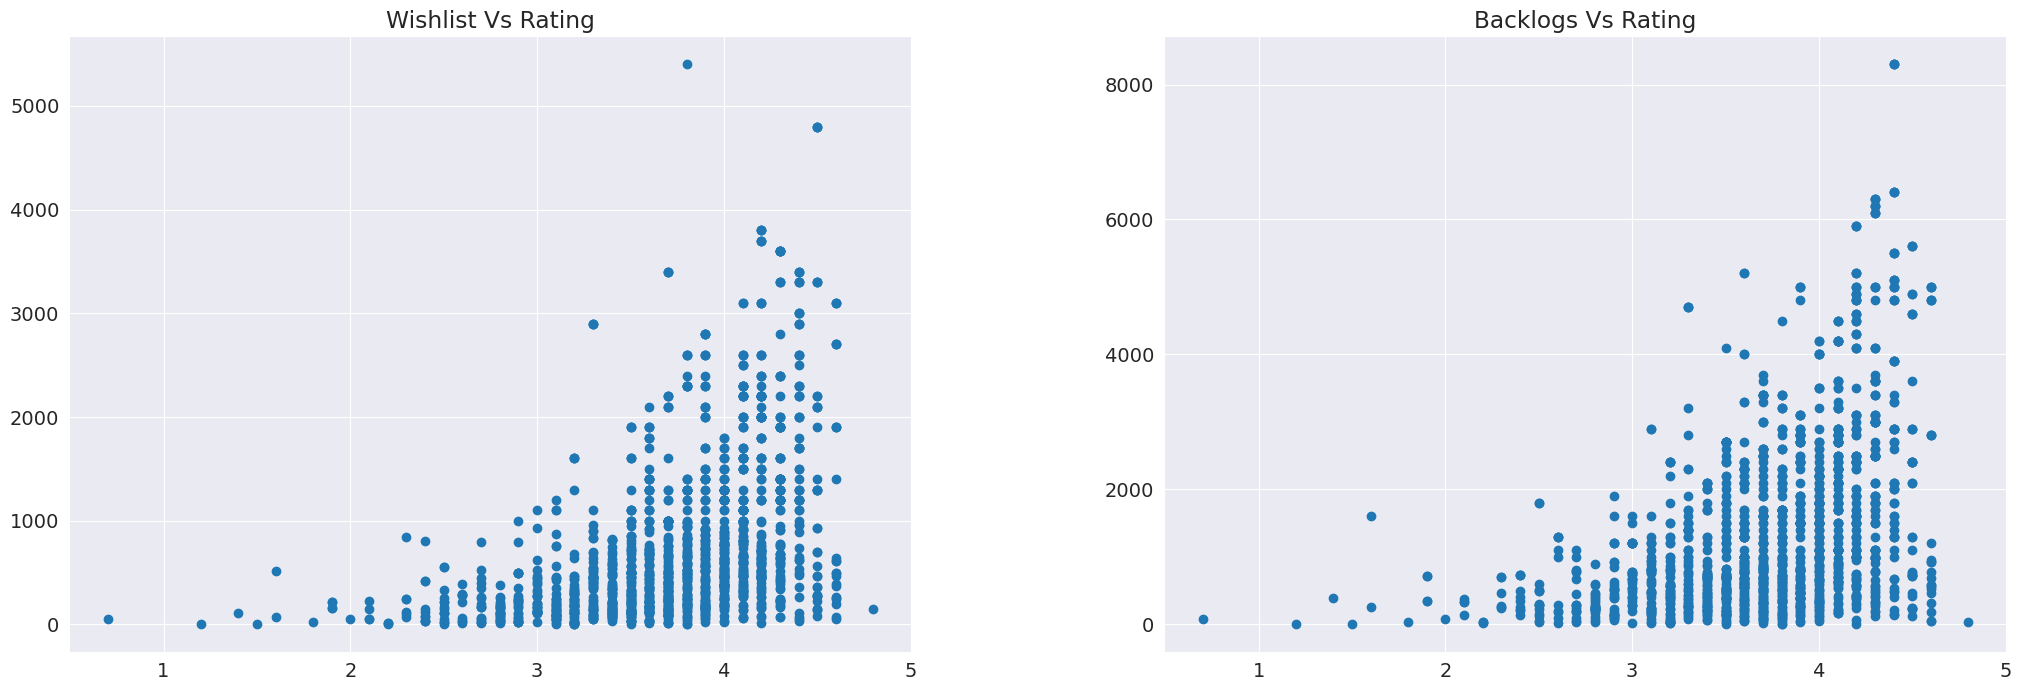

In [25]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8))
ax1.scatter(games['Rating'], games['Wishlist'])
ax1.set_title('Wishlist Vs Rating')

ax2.scatter(games['Rating'], games['Backlogs'])
ax2.set_title('Backlogs Vs Rating')
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
plt.show()

#### Top 10 Played Games?

In [26]:
top_played = games.nlargest(30,'Plays')
top_played

,No,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Day,Month,Year,Week day
5,5,Minecraft,2011-11-18,['Mojang Studios'],4.3,2300.0,2300.0,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33000.0,1800.0,1100.0,230.0,18,Nov,2011,Friday
331,331,Minecraft,2011-11-18,['Mojang Studios'],4.3,2300.0,2300.0,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33000.0,1800.0,1100.0,230.0,18,Nov,2011,Friday
781,781,Minecraft,2011-11-18,['Mojang Studios'],4.3,2300.0,2300.0,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33000.0,1800.0,1100.0,230.0,18,Nov,2011,Friday
2,2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300.0,4300.0,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000.0,2500.0,5000.0,2600.0,3,Mar,2017,Friday
23,23,Grand Theft Auto V,2013-09-17,"['Rockstar North', 'Rockstar Games']",3.8,2100.0,2100.0,"['Adventure', 'Shooter']",Grand Theft Auto V is a vast open world game s...,['People be rating this a 3.... BITCH BE SERIO...,30000.0,829.0,3200.0,664.0,17,Sep,2013,Tuesday
328,328,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300.0,4300.0,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000.0,2500.0,5000.0,2600.0,3,Mar,2017,Friday
349,349,Grand Theft Auto V,2013-09-17,"['Rockstar North', 'Rockstar Games']",3.8,2100.0,2100.0,"['Adventure', 'Shooter']",Grand Theft Auto V is a vast open world game s...,['People be rating this a 3.... BITCH BE SERIO...,30000.0,829.0,3200.0,664.0,17,Sep,2013,Tuesday
778,778,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300.0,4300.0,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000.0,2500.0,5000.0,2600.0,3,Mar,2017,Friday
799,799,Grand Theft Auto V,2013-09-17,"['Rockstar North', 'Rockstar Games']",3.8,2100.0,2100.0,"['Adventure', 'Shooter']",Grand Theft Auto V is a vast open world game s...,"['O Trevor é tipo eu quando o Benfica perde', ...",30000.0,829.0,3200.0,664.0,17,Sep,2013,Tuesday
13,13,Portal 2,2011-04-18,"['Valve', 'Electronic Arts']",4.4,2900.0,2900.0,"['Adventure', 'Platform', 'Puzzle', 'Shooter']","Sequel to the acclaimed Portal (2007), Portal ...","['This is my fav game of all time, everything ...",29000.0,471.0,3900.0,1200.0,18,Apr,2011,Monday


In [27]:
# Remove duplicates in the 'Name' column
top_played = top_played.drop_duplicates(subset=['Title'])
top_played

,No,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist,Day,Month,Year,Week day
5,5,Minecraft,2011-11-18,['Mojang Studios'],4.3,2300.0,2300.0,"['Adventure', 'Simulator']",Minecraft focuses on allowing the player to ex...,['Minecraft is what you make of it. Unfortunat...,33000.0,1800.0,1100.0,230.0,18,Nov,2011,Friday
2,2,The Legend of Zelda: Breath of the Wild,2017-03-03,"['Nintendo', 'Nintendo EPD Production Group No...",4.4,4300.0,4300.0,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30000.0,2500.0,5000.0,2600.0,3,Mar,2017,Friday
23,23,Grand Theft Auto V,2013-09-17,"['Rockstar North', 'Rockstar Games']",3.8,2100.0,2100.0,"['Adventure', 'Shooter']",Grand Theft Auto V is a vast open world game s...,['People be rating this a 3.... BITCH BE SERIO...,30000.0,829.0,3200.0,664.0,17,Sep,2013,Tuesday
13,13,Portal 2,2011-04-18,"['Valve', 'Electronic Arts']",4.4,2900.0,2900.0,"['Adventure', 'Platform', 'Puzzle', 'Shooter']","Sequel to the acclaimed Portal (2007), Portal ...","['This is my fav game of all time, everything ...",29000.0,471.0,3900.0,1200.0,18,Apr,2011,Monday
3,3,Undertale,2015-09-15,"['tobyfox', '8-4']",4.2,3500.0,3500.0,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28000.0,679.0,4900.0,1800.0,15,Sep,2015,Tuesday
18,18,Portal,2007-10-10,"['Valve', 'Electronic Arts']",4.1,2000.0,2000.0,"['Platform', 'Puzzle', 'Shooter']","Waking up in a seemingly empty laboratory, the...","['did somebody say CLASSSSICCCC', ""Portal's de...",28000.0,244.0,2700.0,1100.0,10,Oct,2007,Wednesday
8,8,Among Us,2018-06-15,['InnerSloth'],3.0,867.0,867.0,"['Indie', 'Strategy']",Join your crew-mates in a multiplayer game of ...,"[""it's a solid party game. i'm bad at lying th...",25000.0,470.0,776.0,126.0,15,Jun,2018,Friday
19,19,Super Mario Odyssey,2017-10-27,['Nintendo'],4.2,2900.0,2900.0,"['Adventure', 'Platform']",Explore incredible places far from the Mushroo...,"[""A really great game, just didn't stick out a...",25000.0,710.0,2900.0,2000.0,27,Oct,2017,Friday
33,33,Super Smash Bros. Ultimate,2018-12-07,"['Sora', 'Nintendo']",4.1,2500.0,2500.0,"['Fighting', 'Platform']",Legendary game worlds and fighters collide in ...,"['Recomendadisimo (aunque ""el modo historia"" n...",25000.0,1200.0,1100.0,801.0,7,Dec,2018,Friday
54,54,The Elder Scrolls V: Skyrim,2011-11-10,"['Bethesda Game Studios', 'Bethesda Softworks']",3.7,1700.0,1700.0,"['Adventure', 'RPG']",Skyrim reimagines and revolutionizes the open-...,['I feel like a wet rat in a bathtub when I pl...,22000.0,589.0,3000.0,1000.0,10,Nov,2011,Thursday


In [28]:
top_played.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 5 to 54
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   No                 10 non-null     int64         
 1   Title              10 non-null     object        
 2   Release Date       10 non-null     datetime64[ns]
 3   Team               10 non-null     object        
 4   Rating             10 non-null     float64       
 5   Times Listed       10 non-null     float64       
 6   Number of Reviews  10 non-null     float64       
 7   Genres             10 non-null     object        
 8   Summary            10 non-null     object        
 9   Reviews            10 non-null     object        
 10  Plays              10 non-null     float64       
 11  Playing            10 non-null     float64       
 12  Backlogs           10 non-null     float64       
 13  Wishlist           10 non-null     float64       
 14  Day         

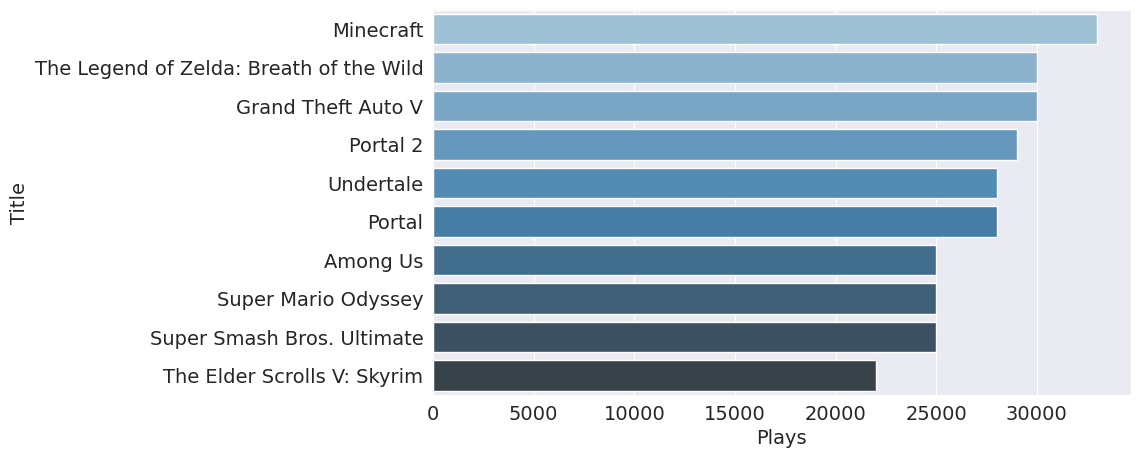

In [29]:
sns.barplot(data = top_played, x = 'Plays', y = 'Title', palette = 'Blues_d');